In [1]:
import requests
import json
from pprint import pprint
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from census import Census

from config import api_key
c = Census(api_key, year=2019)

In [2]:
#Import cleaned csv
cleandata = "../Resources/Cleaned.csv"

df = pd.read_csv(cleandata)
df.head(25)

,Unnamed: 0,name,year,latitude,longitude,city,region,zipCode,cuisine,price,url,Michelin Star Count
0,0,Kilian Stuba,2019,47.348580,10.171140,Kleinwalsertal,Austria,87568,Creative,$$$$$,https://guide.michelin.com/at/en/vorarlberg/kl...,1
1,1,Pfefferschiff,2019,47.837870,13.079170,Hallwang,Austria,5300,Classic cuisine,$$$$$,https://guide.michelin.com/at/en/salzburg-regi...,1
2,2,Esszimmer,2019,47.806850,13.034090,Salzburg,Austria,5020,Creative,$$$$$,https://guide.michelin.com/at/en/salzburg-regi...,1
3,3,Carpe Diem,2019,47.800010,13.040060,Salzburg,Austria,5020,Market cuisine,$$$$$,https://guide.michelin.com/at/en/salzburg-regi...,1
4,4,Edvard,2019,48.216503,16.368520,Wien,Austria,1010,Modern cuisine,$$$$,https://guide.michelin.com/at/en/vienna/wien/r...,1
5,5,Das Loft,2019,48.212720,16.379310,Wien,Austria,1020,Modern cuisine,$$$$$,https://guide.michelin.com/at/en/vienna/wien/r...,1
6,6,Pramerl & the Wolf,2019,48.209450,16.371740,Wien,Austria,1090,Creative,$$$$$,https://guide.michelin.com/at/en/vienna/wien/r...,1
7,7,Walter Bauer,2019,48.209230,16.376720,Wien,Austria,1010,Classic cuisine,$$$$$,https://guide.michelin.com/at/en/vienna/wien/r...,1
8,8,SHIKI,2019,48.204067,16.370980,Wien,Austria,1010,Japanese,$$$$$,https://guide.michelin.com/at/en/vienna/wien/r...,1
9,9,Tian,2019,48.205130,16.374560,Wien,Austria,1010,Vegetarian,$$$$$,https://guide.michelin.com/at/en/vienna/wien/r...,1


In [3]:
df.cuisine.value_counts()

Modern cuisine       108
Contemporary          75
Japanese              54
Creative              46
Cantonese             40
                    ... 
Danish                 1
Moroccan               1
International          1
Market cuisine         1
Sichuan-Huai Yang      1
Name: cuisine, Length: 70, dtype: int64

In [4]:
df.cuisine.unique()

array(['Creative', 'Classic cuisine', 'Market cuisine', 'Modern cuisine',
       'Japanese', 'Vegetarian', 'Contemporary', 'Indian', 'Korean',
       'Californian', 'American', 'International', 'Moroccan', 'Thai',
       'Chinese', 'Fusion', 'Italian', 'French', 'Asian', 'Steakhouse',
       'Mexican', 'Gastropub', 'Danish', 'Classic French', 'Finnish',
       'Mediterranean', 'Seafood', 'Cantonese', 'Dim Sum', 'Teppanyaki',
       'Sushi', 'Shanghainese', 'Noodles and congee', 'Innovative',
       'Cantonese Roast Meats', 'Taizhou', 'Sichuan',
       'European contemporary', 'Scandinavian', 'Austrian', 'Spanish',
       'Modern British', 'modern', 'Asian influences', 'creative',
       'French contemporary', 'Korean contemporary', 'Temple cuisine',
       'Street Food', 'Fujian', 'Australian', 'Italian contemporary',
       'Barbecue', 'Peranakan', 'Meats and grills', 'Taiwanese',
       'Hang Zhou', 'Asian contemporary', 'Thai Contemporary',
       'Southern Thai', 'European', 'Creat

In [5]:
df.price.value_counts()

$$$$        197
No Price    176
$$$         143
$$           75
$$$$$        73
$            31
Name: price, dtype: int64

In [6]:
star_df = df["Michelin Star Count"].value_counts().reset_index()
star_df.columns= ["Micheline Star", "Count"]
star_df

,Micheline Star,Count
0,1,549
1,2,110
2,3,36


What cuisine types are most popular in Michelin star restaurants?

In [7]:
df["cuisine"].unique

<bound method Series.unique of 0             Creative
1      Classic cuisine
2             Creative
3       Market cuisine
4       Modern cuisine
            ...       
690           Creative
691     Classic French
692             French
693           Japanese
694             French
Name: cuisine, Length: 695, dtype: object>

In [8]:
#Find amount of Michelin Star Restaurants by cuisine
cuisine_df = df["cuisine"].value_counts().reset_index()
cuisine_df.columns= ["Cuisine", "Count"]
cuisine_df

,Cuisine,Count
0,Modern cuisine,108
1,Contemporary,75
2,Japanese,54
3,Creative,46
4,Cantonese,40
...,...,...
65,Danish,1
66,Moroccan,1
67,International,1
68,Market cuisine,1


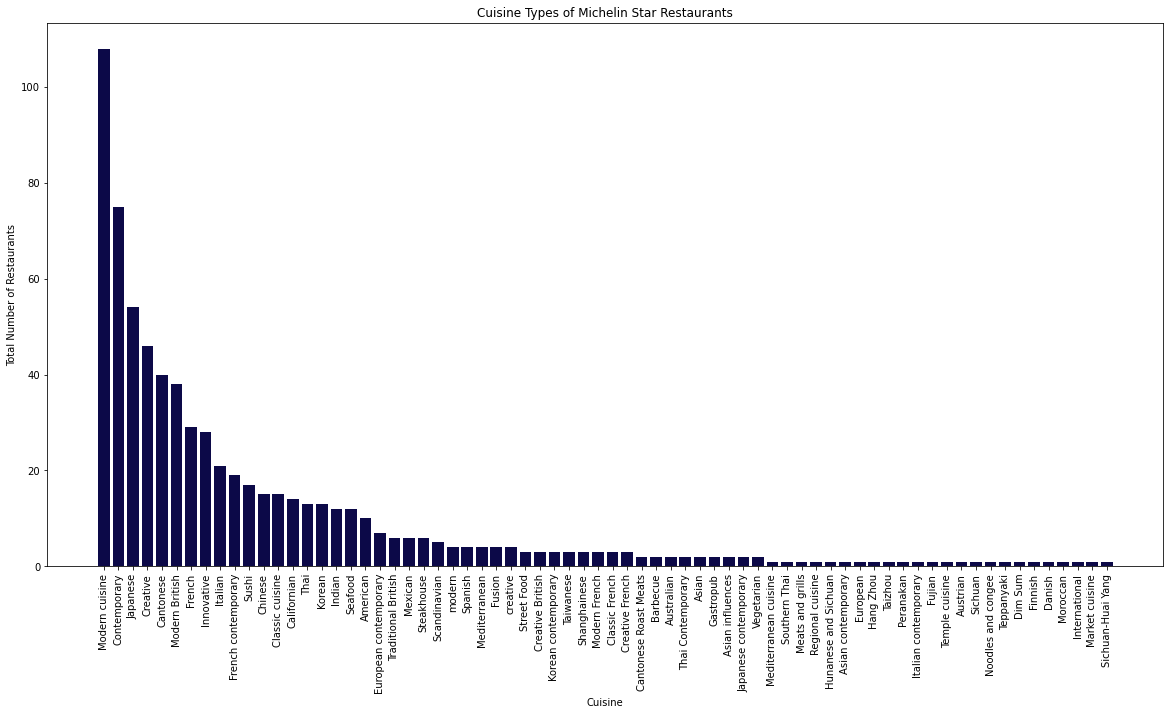

In [10]:
#Graph all Cuisine types b y count
plt.figure(figsize=(20,10))
plt.bar(cuisine_df["Cuisine"], cuisine_df["Count"], color= "#0C0948")
plt.xticks(cuisine_df["Cuisine"], rotation='vertical')
plt.title("Cuisine Types of Michelin Star Restaurants")
plt.xlabel("Cuisine")
plt.ylabel("Total Number of Restaurants")
plt.savefig('all_cuisine_new_colors.png')
plt.show()

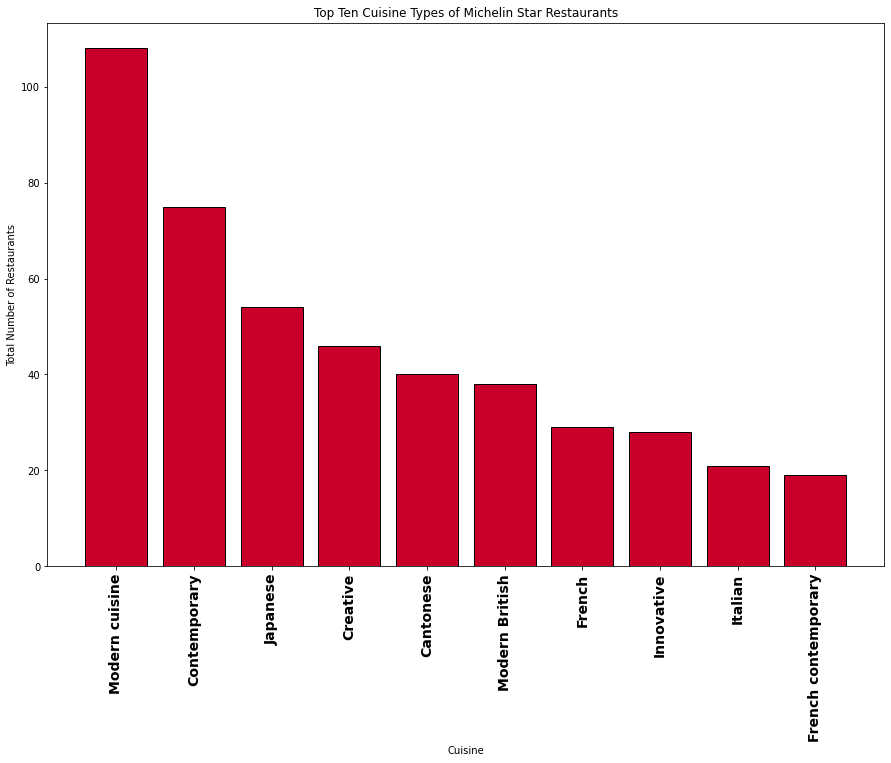

In [11]:
#Graph top ten cuisine types
top_cuisine= cuisine_df.head(10)
plt.figure(figsize=(15,10))
plt.bar(top_cuisine["Cuisine"], top_cuisine["Count"], color= "#C9002A", edgecolor= "black")
plt.xticks(top_cuisine["Cuisine"], rotation='vertical', fontsize= 14, weight= "bold")
plt.title("Top Ten Cuisine Types of Michelin Star Restaurants")
plt.xlabel("Cuisine")
plt.ylabel("Total Number of Restaurants")
plt.savefig('top_ten_cuisine_new_colors.png')
plt.show()


What proportion of Michelin star restaurants is one versus two versus three star restaurants?


In [12]:
star_df = df["Michelin Star Count"].value_counts().reset_index()
star_df.columns= ["Micheline Star", "Count"]
star_df

,Micheline Star,Count
0,1,549
1,2,110
2,3,36


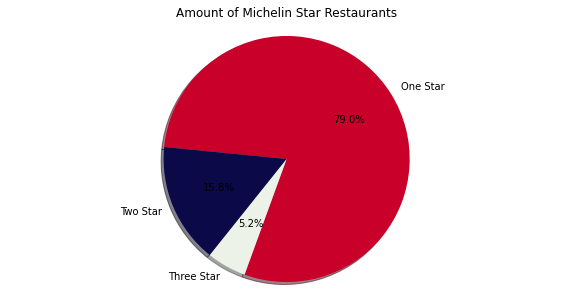

In [24]:
#Pie chart of Michelin Star restaurants globally
plt.figure(figsize=(10,5))
labels = ["One Star", "Two Star", "Three Star"]
colors = ["#C9002A", "#0C0948", "#EDF2E8"]
plt.pie(star_df["Count"], labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=250)
plt.axis("equal")
plt.title("Amount of Michelin Star Restaurants")
plt.savefig('star_rating_all_pie_new_colors.png')
plt.show()


What is the most frequent cuisine style by star rating?

In [14]:
top_cuisine

,Cuisine,Count
0,Modern cuisine,108
1,Contemporary,75
2,Japanese,54
3,Creative,46
4,Cantonese,40
5,Modern British,38
6,French,29
7,Innovative,28
8,Italian,21
9,French contemporary,19


In [15]:
mask= df["Michelin Star Count"]==1
one_star = df.value_counts(df.cuisine.loc[mask]).reset_index()
one_star.columns= ["cuisine", "count"]
one_star_top=one_star.head(10)
one_star_top

,cuisine,count
0,Modern cuisine,97
1,Contemporary,47
2,Japanese,44
3,Modern British,34
4,Cantonese,31
5,Creative,29
6,Innovative,21
7,French,19
8,Italian,19
9,Classic cuisine,14


In [16]:
mask= df["Michelin Star Count"]==2
two_star = df.value_counts(df.cuisine.loc[mask]).reset_index()
two_star.columns= ["cuisine", "count"]
two_star_top=two_star.head(10)
two_star_top

,cuisine,count
0,Contemporary,18
1,Creative,14
2,Modern cuisine,9
3,Japanese,8
4,French,7
5,French contemporary,7
6,Innovative,6
7,Cantonese,5
8,Sushi,4
9,Modern British,4


In [17]:
mask= df["Michelin Star Count"]==3
three_star = df.value_counts(df.cuisine.loc[mask]).reset_index()
three_star.columns= ["cuisine", "count"]
three_star_top=three_star.head(10)
three_star_top

,cuisine,count
0,Contemporary,10
1,Cantonese,4
2,Creative,3
3,French,3
4,French contemporary,2
5,Japanese,2
6,Korean,2
7,Modern cuisine,2
8,American,1
9,Asian,1


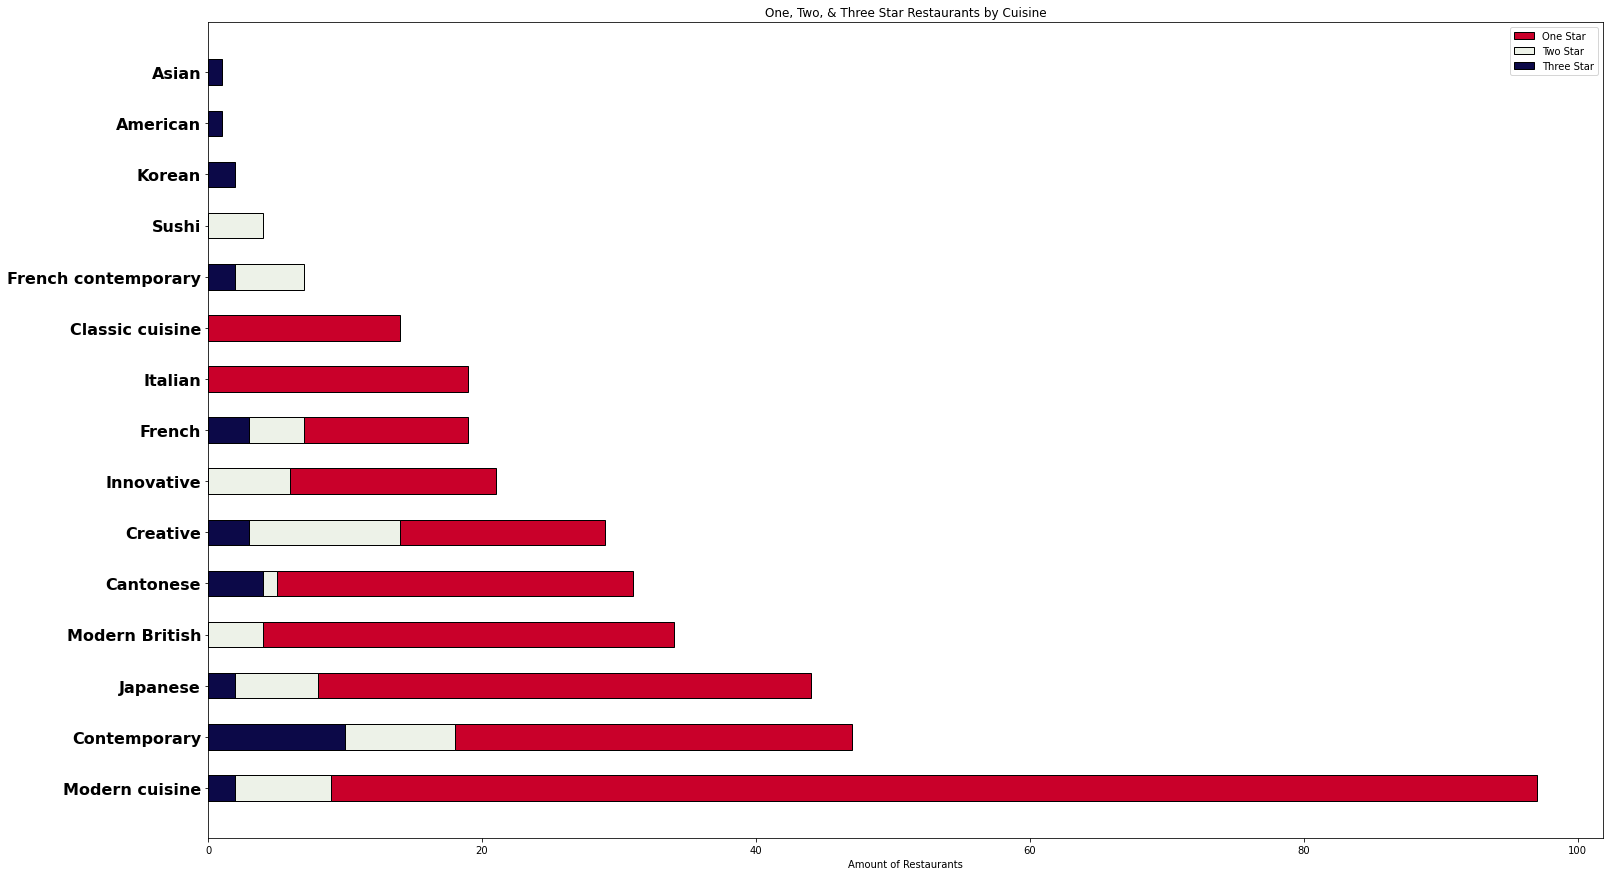

In [18]:
#Stacked Bar Chart
plt.figure(figsize=(25,15))
plt.barh(one_star_top["cuisine"], one_star_top["count"], 0.5, label= "One Star", color= "#C9002A",  edgecolor= "black" )
plt.barh(two_star_top["cuisine"], two_star_top["count"], 0.5, label= "Two Star", color = "#EDF2E8", edgecolor= "black")
plt.barh(three_star_top["cuisine"], three_star_top["count"], 0.5, label= "Three Star", color= "#0C0948", edgecolor= "black")
plt.xlabel("Amount of Restaurants")
plt.yticks( rotation='horizontal', fontsize= 16, weight= "bold")
plt.title("One, Two, & Three Star Restaurants by Cuisine")
plt.legend()
plt.savefig('star_rating_cuisine_stackedbar_new_colors.png')
plt.show()


In [19]:
#Import census data
census_data = c.acs5.get(("NAME", "B19013_001E", "B01003_001E", "B01002_001E",
                          "B19301_001E",
                          "B17001_002E",
                          "B23025_005E"), {'for': 'zip code tabulation area:*'})

# Convert to DataFrame
census_pd = pd.DataFrame(census_data)

# Column Reordering
census_pd = census_pd.rename(columns={"B01003_001E": "Population",
                                      "B01002_001E": "Median Age",
                                      "B19013_001E": "Household Income",
                                      "B19301_001E": "Per Capita Income",
                                      "B17001_002E": "Poverty Count",
                                      "B23025_005E": "Unemployment Count",
                                      "NAME": "Name",
                                      "zip code tabulation area": "zipCode"})

# Add in Employment Rate (Employment Count / Population)
census_pd["Unemployment Rate"] = 100 * \
    census_pd["Unemployment Count"].astype(
        int) / census_pd["Population"].astype(int)


#Final Dataframe
census_pd = census_pd[["zipCode", "Name", "Population", "Median Age", "Household Income",
                       "Per Capita Income", "Poverty Count", "Unemployment Count", "Unemployment Rate"]]

census_pd.head()

,zipCode,Name,Population,Median Age,Household Income,Per Capita Income,Poverty Count,Unemployment Count,Unemployment Rate
0,00601,ZCTA5 00601,17113.0,41.9,14361.0,7493.0,10552.0,1968.0,11.500029
1,00602,ZCTA5 00602,37751.0,42.9,16807.0,9694.0,18653.0,1420.0,3.761490
2,00603,ZCTA5 00603,47081.0,42.1,16049.0,11259.0,23691.0,3197.0,6.790425
3,00606,ZCTA5 00606,6392.0,44.3,12119.0,6093.0,4185.0,169.0,2.643930
4,00610,ZCTA5 00610,26686.0,42.7,19898.0,10572.0,12204.0,1029.0,3.855954


In [20]:
merged_df = pd.merge(df, census_pd, on = "zipCode", how = "inner")
merged_df.head()

,Unnamed: 0,name,year,latitude,longitude,city,region,zipCode,cuisine,price,url,Michelin Star Count,Name,Population,Median Age,Household Income,Per Capita Income,Poverty Count,Unemployment Count,Unemployment Rate
0,12,Chez TJ,2019,37.394680,-122.08044,South San Francisco,California,94041,Contemporary,$$$$,https://guide.michelin.com/us/en/california/so...,1,ZCTA5 94041,14572.0,34.6,139818.0,81705.0,815.0,361.0,2.477354
1,13,Protégé,2019,37.427853,-122.14362,South San Francisco,California,94301,Contemporary,$$$,https://guide.michelin.com/us/en/california/so...,1,ZCTA5 94301,16582.0,44.9,159148.0,110423.0,1153.0,357.0,2.152937
2,14,Madera,2019,37.420140,-122.21151,San Francisco,California,94025,Contemporary,$$$,https://guide.michelin.com/us/en/california/sa...,1,ZCTA5 94025,43392.0,38.3,161827.0,85240.0,3103.0,843.0,1.942754
3,15,The Village Pub,2019,37.428970,-122.25178,San Francisco,California,94062,Contemporary,$$$,https://guide.michelin.com/us/en/california/sa...,1,ZCTA5 94062,28423.0,45.0,178480.0,95838.0,1885.0,420.0,1.477677
4,16,Plumed Horse,2019,37.256480,-122.03537,South San Francisco,California,95070,Contemporary,$$$$,https://guide.michelin.com/us/en/california/so...,1,ZCTA5 95070,31196.0,50.2,193617.0,94484.0,1455.0,527.0,1.689319


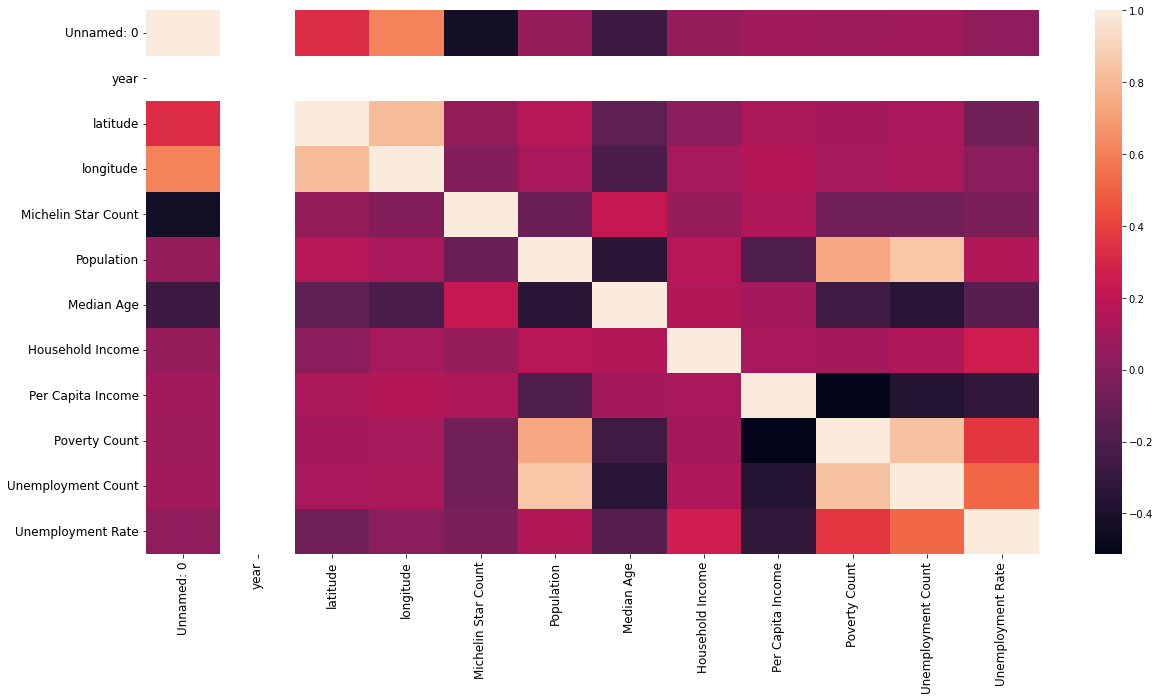

In [21]:

plt.figure(figsize=(20,10))
corrs = merged_df.corr()
sns.heatmap(corrs)
plt.xticks(fontsize= 12)
plt.yticks(fontsize= 12)
plt.savefig('heatmap.png')
plt.show()

In [22]:
corrs

,Unnamed: 0,year,latitude,longitude,Michelin Star Count,Population,Median Age,Household Income,Per Capita Income,Poverty Count,Unemployment Count,Unemployment Rate
Unnamed: 0,1.000000,NaN,0.330495,0.605249,-0.431169,0.059282,-0.266774,0.059094,0.095111,0.086220,0.095323,0.035964
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
latitude,0.330495,NaN,1.000000,0.811748,0.050993,0.169738,-0.144859,0.022543,0.121921,0.104696,0.115400,-0.072933
longitude,0.605249,NaN,0.811748,1.000000,-0.006508,0.115478,-0.217310,0.108406,0.161209,0.109800,0.124982,0.009738
Michelin Star Count,-0.431169,NaN,0.050993,-0.006508,1.000000,-0.105043,0.223025,0.055663,0.144804,-0.076914,-0.077653,-0.036240
Population,0.059282,NaN,0.169738,0.115478,-0.105043,1.000000,-0.341110,0.174145,-0.203816,0.735340,0.856944,0.151729
Median Age,-0.266774,NaN,-0.144859,-0.217310,0.223025,-0.341110,1.000000,0.150559,0.100188,-0.263273,-0.350873,-0.169726
Household Income,0.059094,NaN,0.022543,0.108406,0.055663,0.174145,0.150559,1.000000,0.114280,0.104375,0.147497,0.260378
Per Capita Income,0.095111,NaN,0.121921,0.161209,0.144804,-0.203816,0.100188,0.114280,1.000000,-0.513067,-0.367785,-0.313045
Poverty Count,0.086220,NaN,0.104696,0.109800,-0.076914,0.735340,-0.263273,0.104375,-0.513067,1.000000,0.839228,0.362735


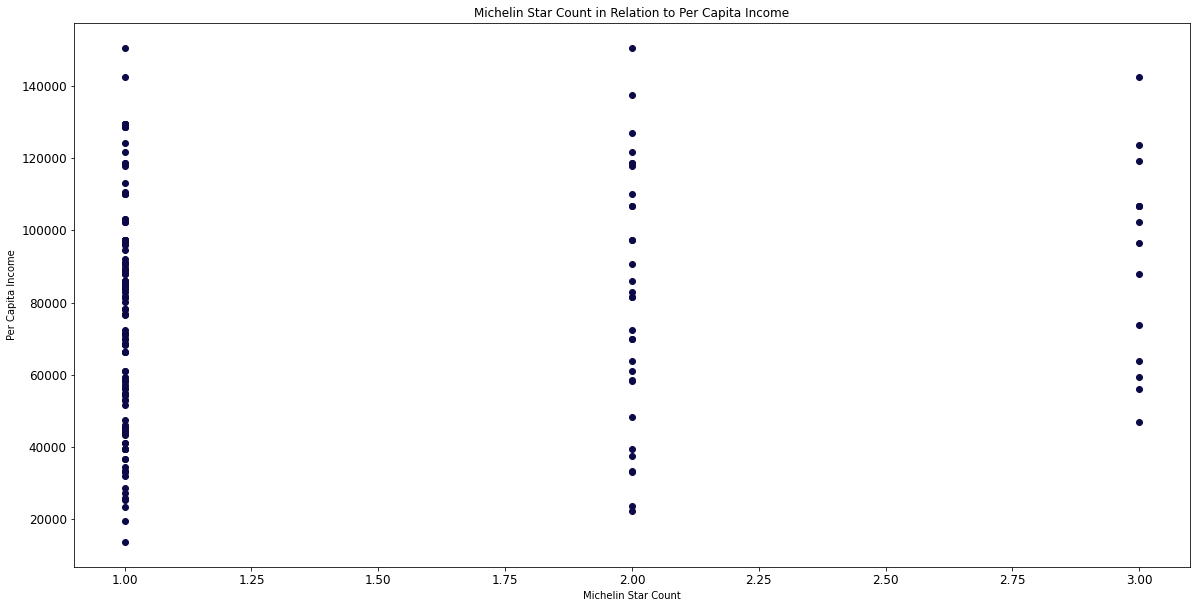

In [23]:
x_values = merged_df["Michelin Star Count"]
y_values = merged_df['Per Capita Income']
plt.figure(figsize= (20,10))
plt.scatter(x_values,y_values, color= "#0C0948")
plt.xticks(fontsize= 12)
plt.yticks(fontsize= 12)
plt.xlabel("Michelin Star Count")
plt.ylabel("Per Capita Income")
plt.title("Michelin Star Count in Relation to Per Capita Income")
plt.savefig('msc_pci_scatter.png')
plt.show()